In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Clean (1).csv to Titanic-Clean (1).csv


In [ ]:
df = pd.read_csv('Titanic-Clean (1).csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",female,22.0,1,0,A/5 21171,7.2500,E35,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A68,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A81,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# misal kolom target bernama 'Survived', dan fitur lain sudah bersih
# Drop non-numerical and identifier columns that are not suitable for scaling
X = df.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)
y = df['Survived']

# split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standrisasi fiture numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Membuat model neural network dengan 2 hidden layer
model = Sequential()

# Input layer dan hidden layer pertama (16 neuron, aktivasi relu)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer kedua (8 neuron, aktivasi relu)
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron, aktivasi sigmoid untuk klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

# Menampilkan ringkasan arsitektur model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5408 - loss: 0.6946 - val_accuracy: 0.6573 - val_loss: 0.6834
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6201 - loss: 0.6824 - val_accuracy: 0.6853 - val_loss: 0.6680
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6647 - loss: 0.6661 - val_accuracy: 0.6853 - val_loss: 0.6551
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7132 - loss: 0.6485 - val_accuracy: 0.6923 - val_loss: 0.6423
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7049 - loss: 0.6408 - val_accuracy: 0.6923 - val_loss: 0.6314
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7032 - loss: 0.6299 - val_accuracy: 0.7063 - val_loss: 0.6210
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6787 - loss: 0.6306 - val_accuracy: 0.7133 - val_loss: 0.6130
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6847 - loss: 0.6173 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Losss pada data uji: {loss:.2f}')
print(f'Akurasi pada data uji: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.5220 
Losss pada data uji: 0.52
Akurasi pada data uji: 0.7597765326499939


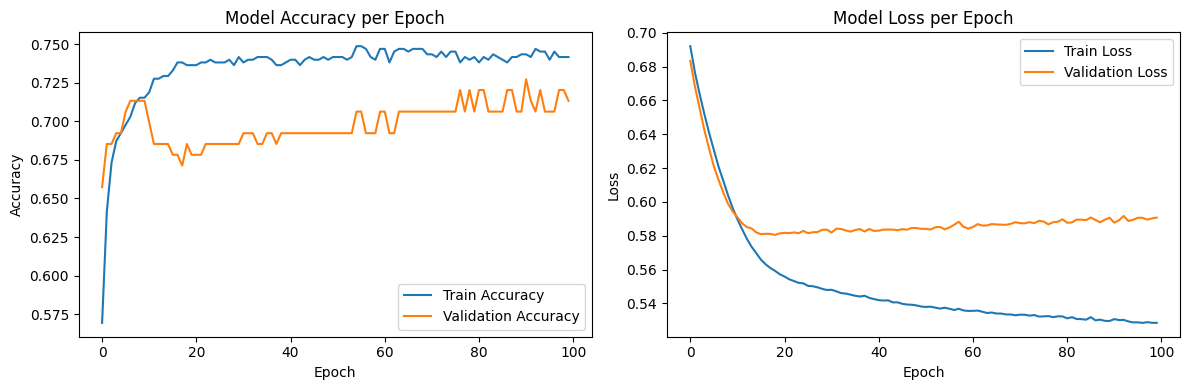

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Visualisasi Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()